# Interest Rate Spreads
Interest rate spreads are sometimes used as a harbinger of upcoming economic slowdowns. The most widely used ones are the difference between: 1) 10-year and 2-year Treasury yields, and 2) 10-year and 3-month Treasury yields. In an economy that is expected to grow at a steady pace over 10 years, the difference is likely to be positive. In case of an impending recenssion the difference can turn negative.

Looking at just this treasury yield spread alone doesn't assuredly tell us if the inversion can be mostly attributed to an upcoming recession or to differences in inflation expectations. Lower long-term inflation expectations compared to short-term ones can also lead to an inversion in the treasury yield curve. This is because a treasury yield is made up of:

`Treasury yield = expected average future real short rate + real term premium + expected inflation + inflation risk premium`

where the `inflation risk premium` and the `real term premium` are extra compensations bond investors demand for bearing inflation risks and real interest rate risks, respectively. I.e. the risks that actual inflation and short term rates will turn out to be different from those expected. Expected average future real short rate is related to expected real GDP growth. This is why the inversion of the curve might imply a recession, i.e. when future GDP growth is less than the current one.

To arrive at a more accurate conclusion we should also take a look at the spread between different Breakeven Inflation rates (as given by subtracting the yield on the Treasury Inflation-Protected Securities of N-Year maturity from the yield on the ordinary Treasury Bond of the same N-Year maturity). A breakeven inflation rate consist of:

`Breakeven inflation rate = expected inflation + inflation risk premium`

You can read up more on this theory [here](https://www.federalreserve.gov/econres/notes/feds-notes/tips-from-tips-update-and-discussions-20190521.html).


I use the following dataseries from FRED to accomplish the task:
* `T10Y2Y` &mdash;  10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (daily frequency, yield expressed with semiannual compounding frequency)
* `T10Y3M` &mdash;  10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (daily frequency, yield expressed with semiannual compounding frequency)
* `DGS10` &mdash; Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis (daily frequency, yield expressed with semiannual compounding frequency)
* `DGS20` &mdash; Market Yield on U.S. Treasury Securities at 20-Year Constant Maturity, Quoted on an Investment Basis (daily frequency, yield expressed with semiannual compounding frequency)
* `T5YIE` &mdash; 5-Year Breakeven Inflation Rate (daily frequency, [spot rate expressed with annual compounding frequency](https://home.treasury.gov/system/files/226/bri_mar2019_acc.pdf))
* `T10YIE` &mdash; 10-Year Breakeven Inflation Rate (daily frequency, spot rate expressed with annual compounding frequency)

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail

# Install the latest version of pandas datareader
#!pip install pandas-datareader -U

In [2]:
from datetime import date

import pandas_datareader.data as web
import pandas as pd
import matplotlib.ticker as mtick

In [3]:
report_start = date.fromisoformat('2020-01-01')
report_end = date.today()

## Analyzing 10-Year - 5-Year curve inversion with the help of 10-Year and 5-Year Breakeven inflation data
Unfortunately FRED doesn't publish data for 2-year Breakeven inflation rates. Therefore I resort to looking at the differences between 5-year and 10-year treasury yields and breakeven inflation rates instead.

In [4]:
data = web.get_data_fred(['DGS5', 'DGS10', 'T5YIE', 'T10YIE', 'T10Y2Y', 'T10Y3M'], report_start, report_end) / 100.
data.dropna(inplace=True)

columns_with_semiannual_comp = [0, 1, 3, 4]

# Converting all CMT Yields to APY (i.e. all but breakeven inflation rates)
data.iloc[:, columns_with_semiannual_comp] = (data.iloc[:, columns_with_semiannual_comp]/2 + 1)**2 - 1

In [5]:
data['10y Tr. Yield - 5y Tr. Yield'] = data.DGS10 - data.DGS5
data['10y Breakeven Infl. Rate - 5y Breakeven Infl. Rate'] = data.T10YIE - data.T5YIE
data.rename(columns={'T10Y2Y': '10y Tr. Yield - 2y Tr. Yield',
                     'T10Y3M': '10y Tr. Yield - 3m Tr. Yield'}, inplace=True)

In [6]:
# Get rid of columns no longer required
data.drop(columns=data.columns[0:4], inplace=True)

# Rearrange columns
data = data.iloc[:, [2, 3, 0, 1]]

### Visualising the spreads

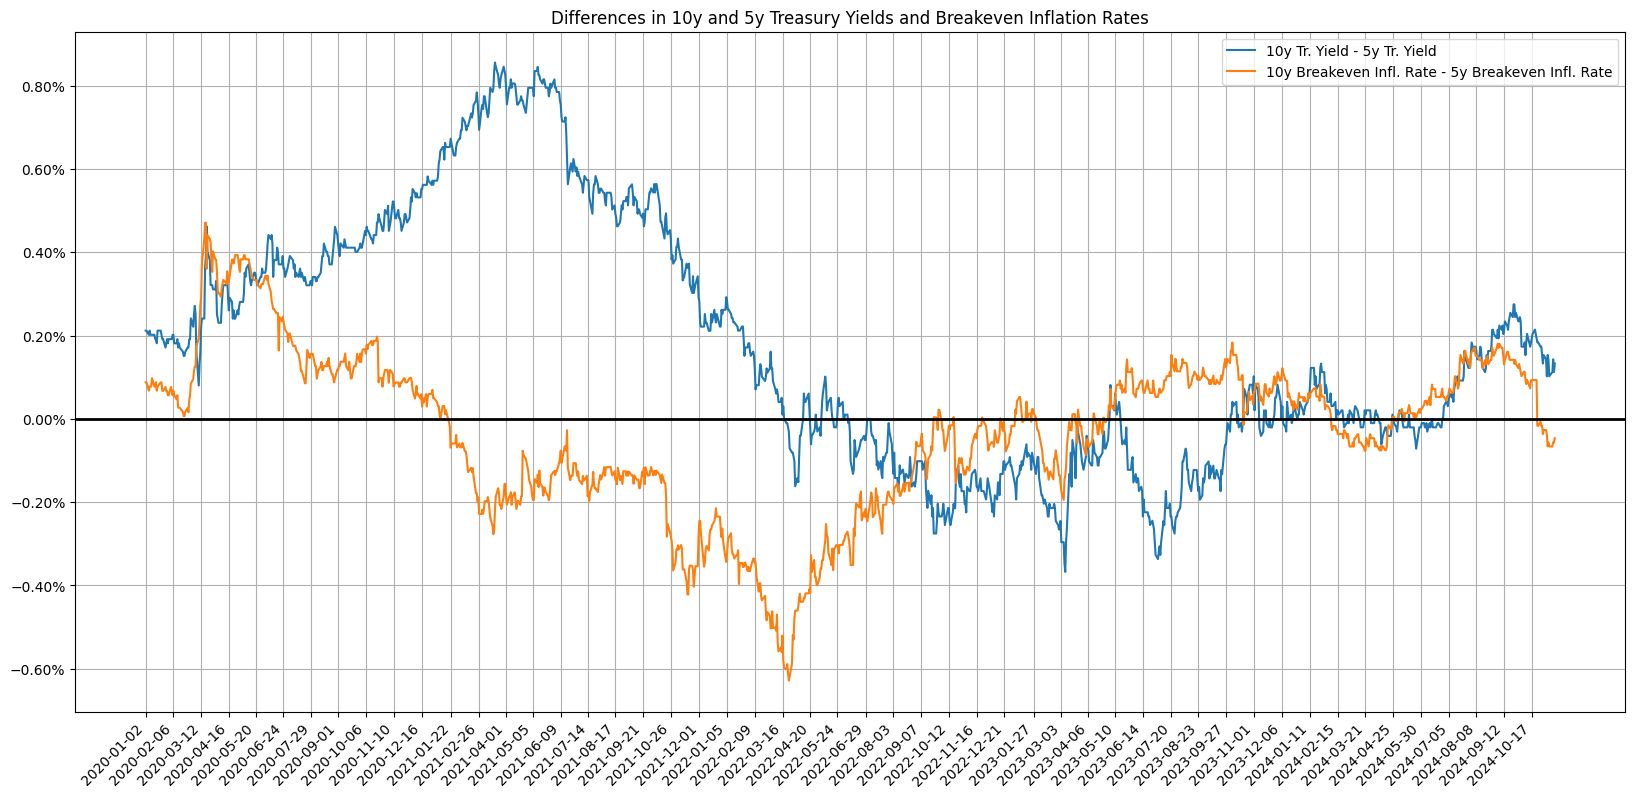

In [7]:
ax = data.iloc[:,:2].plot(figsize=(20,10), grid=True,
                          title='Differences in 10y and 5y Treasury Yields and Breakeven Inflation Rates',
                          xticks=data.index[::24], xlabel='', rot=45)
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [8]:
date_of_inversion = data.iloc[:,0][data.iloc[:,0] < 0].index[0]
date_of_inversion_last = data.iloc[:,0][data.iloc[:,0] < 0].index[-1]
date_of_inversion_peak = data.iloc[:,0].idxmin()
print(f'The inversion of 10-Year - 5-Year yield curves happened on {date_of_inversion:%Y-%m-%d}')
print(f'The peak of inversion was {data.iloc[:,0].min()*1e4:.0f}bps and took place on {date_of_inversion_peak:%Y-%m-%d}')
date_of_inversion_finish = data.iloc[:,0][(data.iloc[:,0] > 0) & (data.index > date_of_inversion_last)]
if len(date_of_inversion_finish) > 0:
    print(f'The inversion ended on {date_of_inversion_finish.index[0]:%Y-%m-%d}')
print(f'The 10-Year - 5-Year yield spread amounts to {data.iloc[-1,0]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')

The inversion of 10-Year - 5-Year yield curves happened on 2022-03-21
The peak of inversion was -37bps and took place on 2023-03-08
The inversion ended on 2024-06-28
The 10-Year - 5-Year yield spread amounts to +13bps as of 2024-11-15


What can we conclude? The yield curve inversion (between 10-year and 5-year treasury yields) that started in March-April 2022 was mostly brought about by growing expectations that average 10-year inflation will be less than the average inflation in the coming 5 years. By now (September 2024) the 10- and 5-year breakeven inflation rates are back to their usual state with 10-year breakeven inflation higher than 5-year one, as a resukt the reversion of the yield curve is gone too.

Let's now visualize the: 1) 10-Year Treasury Yield - 2-Year Treasury Yield, and 2) 10-Year Treasury Yield - 3-Month Treasury Yield spreads:

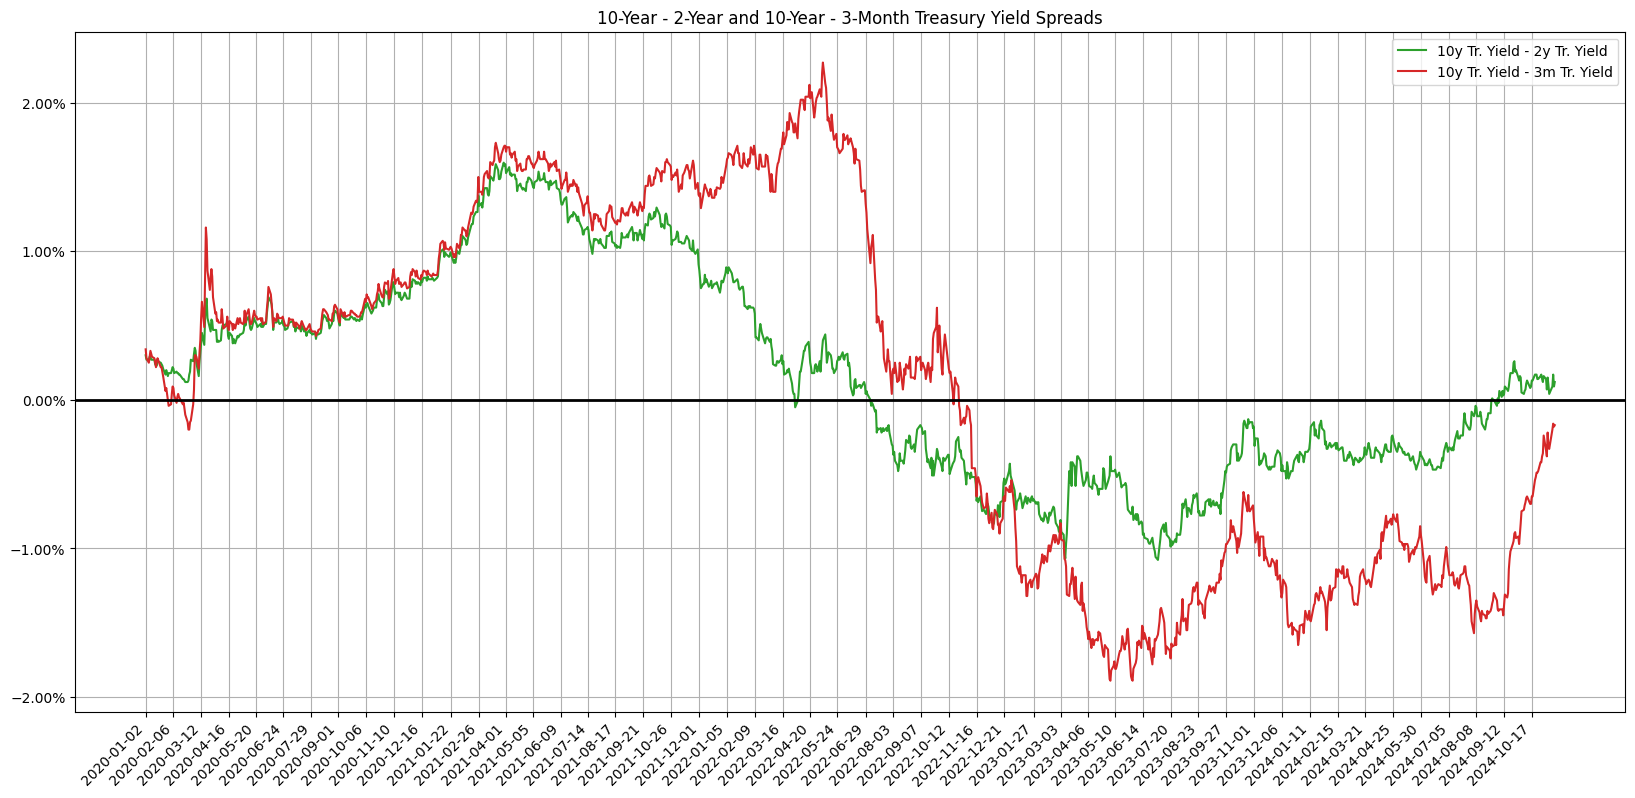

In [9]:
ax = data.iloc[:,2:].plot(figsize=(20,10), grid=True,
               title='10-Year - 2-Year and 10-Year - 3-Month Treasury Yield Spreads', color=['#2ca02c', '#d62728'],
               xticks=data.index[::24], xlabel='', rot=45)
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [17]:
date_of_inversion = data.iloc[:,2][data.iloc[:,2] < 0].index[0]
date_of_inversion_last = data.iloc[:,2][data.iloc[:,2] < 0].index[-1]
date_of_inversion_peak = data.iloc[:,2].idxmin()
print(f'The inversion of 10-Year - 2-Year yield curves happened on {date_of_inversion:%Y-%m-%d}')
print(f'The peak of inversion was {data.iloc[:,2].min()*1e4:.0f}bps and took place on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The inversion amounts to {data.iloc[-1,2]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')
date_of_inversion_finish = data.iloc[:,2][(data.iloc[:,2] > 0) & (data.index > date_of_inversion_last)]
if len(date_of_inversion_finish) > 0:
    print(f'The inversion ended on {date_of_inversion_finish.index[0]:%Y-%m-%d}')
print(f'The 10-Year - 2-Year yield spread amounts to {data.iloc[-1,2]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')

The inversion of 10-Year - 2-Year yield curves happened on 2022-04-01
The peak of inversion was -108bps and took place on 2023-07-03
The inversion amounts to +12bps as of 2024-11-15
The inversion ended on 2024-09-06
The 10-Year - 2-Year yield spread amounts to +12bps as of 2024-11-15


## Analyzing 10-Year - 2-Year curve inversion with the help of 10-Year and 2-Year Expected inflation data
Given that [The Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org) doesn't publish breakeven inflation data for 2-Year maturity, we can use 2-Year expected inflation as a substitute. The Federal Reserve Bank of Cleveland calculates it based on inflation swap data, Treasury Yields, current CPI, Blue Chip forecast of CPI. Analyzing the differences between 5-Year Breakeven inflation rate and 5-Year exected inflation shows that the mean difference is 32bps and standard diviation is 37bps.

Unfortunately I need to switch from daily to monthly freqencies given that this is the finest granularity at which expected inflation data is provided.

I use the following dataseries from FRED to accomplish the task:
* `EXPINF2YR` &mdash; 2-Year Expected Inflation (monthly frequency)
* `EXPINF5YR` &mdash; 5-Year Expected Inflation (monthly frequency)
* `EXPINF10YR` &mdash; 10-Year Expected Inflation (monthly frequency)
* `T5YIEM` &mdash; 5-Year Breakeven Inflation Rate (monthly frequency)
* `T10YIEM` — 10-Year Breakeven Inflation Rate (monthly frequency)
* `T10Y2YM` - &mdash;  10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (monthly frequency)

In [11]:
data2 = web.get_data_fred(['EXPINF5YR', 'T5YIEM', 'EXPINF2YR', 'T10YIEM', 'EXPINF10YR', 'T10Y2YM'],
                          '2000-01-01', report_end) / 100.
data2.dropna(inplace=True)

In [12]:
# Only T10Y2YM is based on a yield with a semiannual compounding frequency
columns_with_semiannual_comp = ['T10Y2YM']

# Converting all CMT Yields to APY (i.e. all but breakeven inflation rates)
data2.loc[:, columns_with_semiannual_comp] = (data2.loc[:, columns_with_semiannual_comp]/2 + 1)**2 - 1

Let's first compare 5-Year breakeven inflation data with 5-Year expected inflation data to see if they are close enough to use the latter as a substitute for the former for shorter maturities (e.g. the 2-Year maturity I am interested in).

In [13]:
abs_diff = (data2.iloc[:,0]-data2.iloc[:,1]).abs()
abs_diff.describe()

count    262.000000
mean       0.003127
std        0.003660
min        0.000018
25%        0.000829
50%        0.001888
75%        0.004098
max        0.031894
dtype: float64

They look close enough: the mean difference is 32bps and standard diviation is 37bps. Let's now look at the standard error:

In [14]:
abs_diff.sem()

np.float64(0.00022609303553661447)

It is small enough at 2bps. Therefore I will adopt the hypothesis that epxected inflation data can be used as a substiture for breakeven inflation.

In [15]:
# Getting rid of no longer needed columns, and calculating the difference between 10-Year and 2-Year
# expected inflation
data2['10y Breakeven Infl. Rate - 2y Expected Infl. Rate'] = data2.iloc[:,3] - data2.iloc[:,2]
data2['10y Expected Infl. Rate - 2y Expected Infl. Rate'] = data2.iloc[:,4] - data2.iloc[:,2]
data2 = data2.iloc[:,5:]
data2.rename(columns={'T10Y2YM': '10y Tr. Yield - 2y Tr. Yield'}, inplace=True)

### Visualizing the spreads

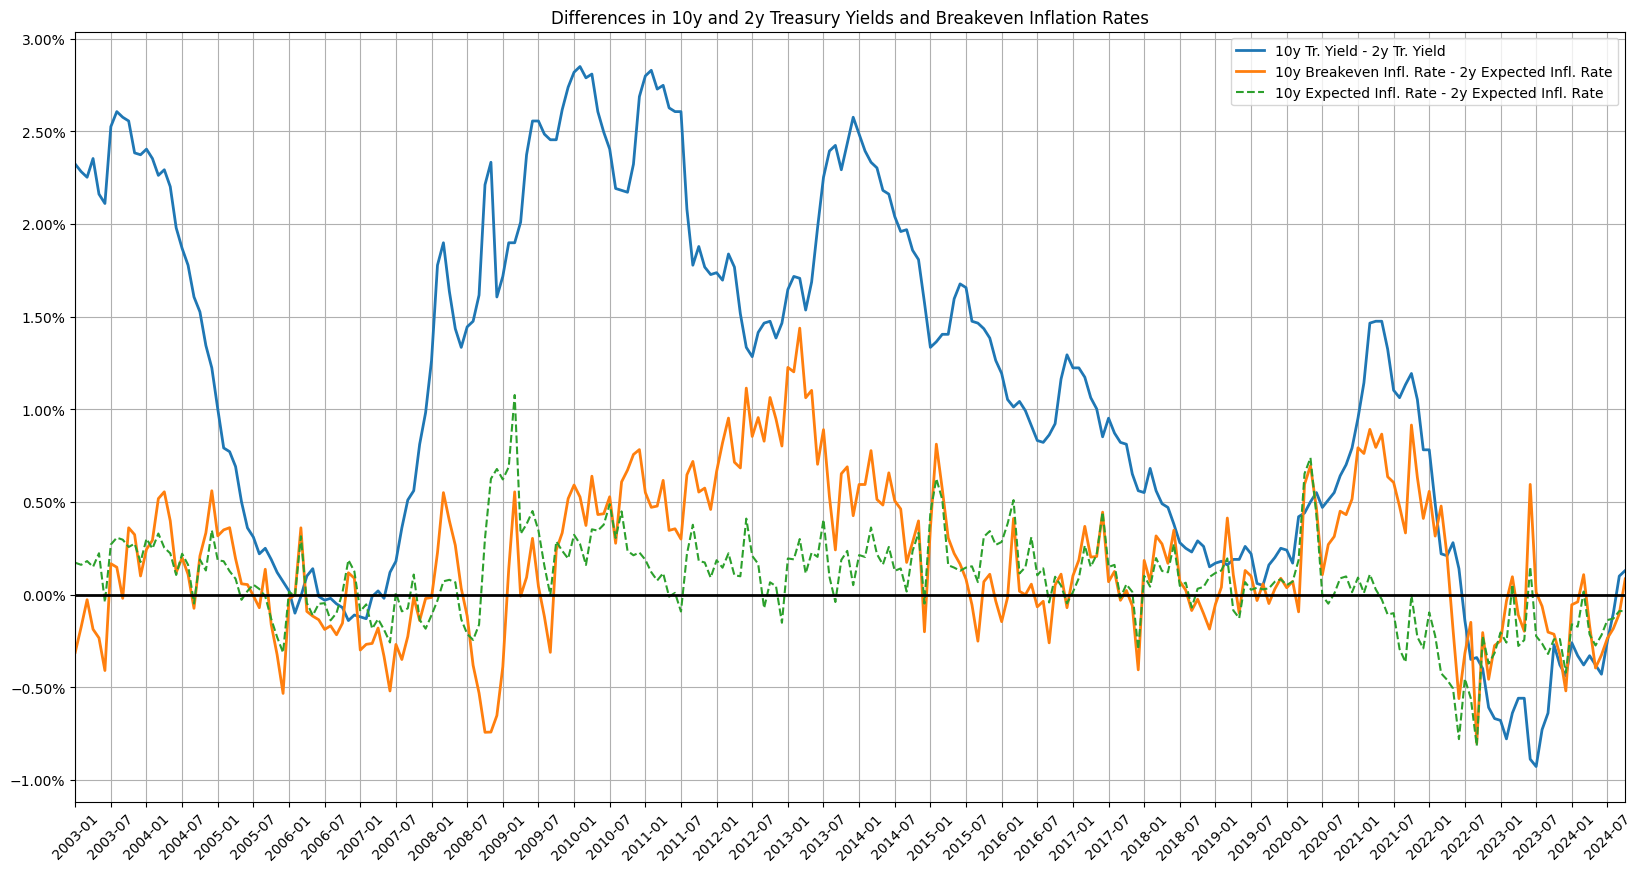

In [16]:
ax = data2.iloc[:, :2].plot(figsize=(20,10), grid=True, linewidth=2,
                title='Differences in 10y and 2y Treasury Yields and Breakeven Inflation Rates',
                xticks=data2.index[::6], xlabel='', rot=45)
ax = data2.iloc[:, 2:].plot(ax=ax, grid=True, xticks=data2.index[::6], xlabel='', rot=45, linestyle='--')
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data2.index[::6])))

What can we conclude? We see a similar trend for the spread between 10-Year and 5-Year yields although less pronounced &mdash; the inversion was to some extent caused by 10-Year inflation expectations being less that 2-Year ones. Now (as of November 2024) the 10- and 2-year inflation expectations are becoming increasingly similar, which causes the 10- and 2-year Treasury yield inversion to disappear.